In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('output_data.csv')
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   caption         1474 non-null   object 
 1   commentsCount   1480 non-null   int64  
 2   likesCount      1480 non-null   int64  
 3   ownerFullName   1480 non-null   object 
 4   ownerUsername   1480 non-null   object 
 5   type            1480 non-null   object 
 6   url             1480 non-null   object 
 7   videoDuration   1015 non-null   float64
 8   videoPlayCount  1012 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 104.2+ KB


In [5]:
df.shape

(1480, 9)

In [6]:
usernames_to_keep = [
    'najottalim', 'proweb.uz', 'haad_uz', 'pdpuz', 'letsanimateuz', 'spaceacademy.uz', 
    'mohirdev', 'tehnikum.school', 'itstep.tashkent', 'astrumuz', 'kadirovdev', 'itacademy_uz'
]

df = df[df['ownerUsername'].isin(usernames_to_keep)]

In [7]:
df.value_counts('ownerUsername')

ownerUsername
najottalim         206
astrumuz           187
spaceacademy.uz    167
haad_uz            141
mohirdev           112
letsanimateuz      111
proweb.uz          108
itacademy_uz       104
pdpuz               92
kadirovdev          88
itstep.tashkent     83
tehnikum.school     22
Name: count, dtype: int64

### 2024-yildagi qo'yilgan postlar soni o'quv markazlar kesimida

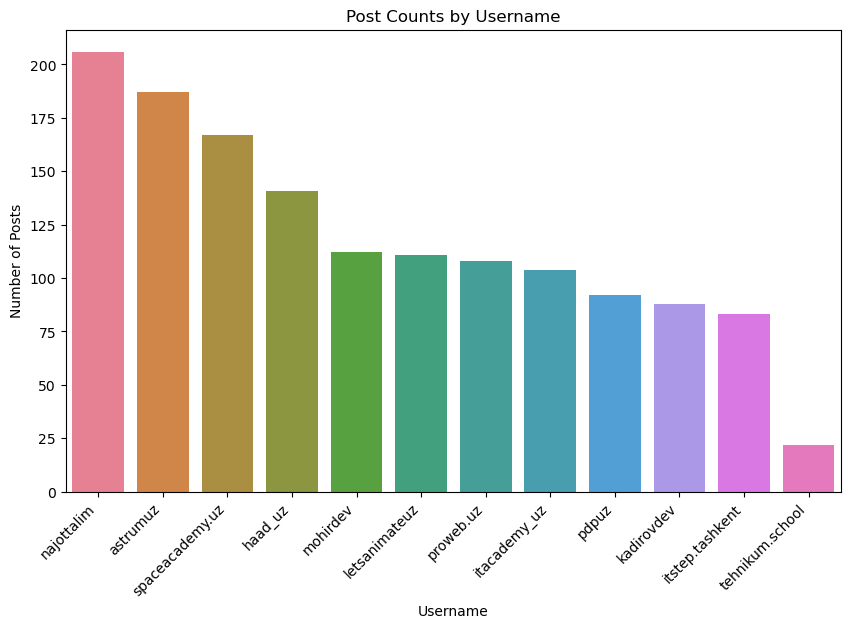

In [8]:
username_counts = df['ownerUsername'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=username_counts.index, y=username_counts.values, hue=username_counts.index, dodge=False, legend=False)
plt.title("Post Counts by Username")
plt.xlabel("Username")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45, ha='right')
plt.show()

### Qoyilgan postlarning turlarining foizlari

Text(0.5, 1.0, 'Percentage of Each Post Type')

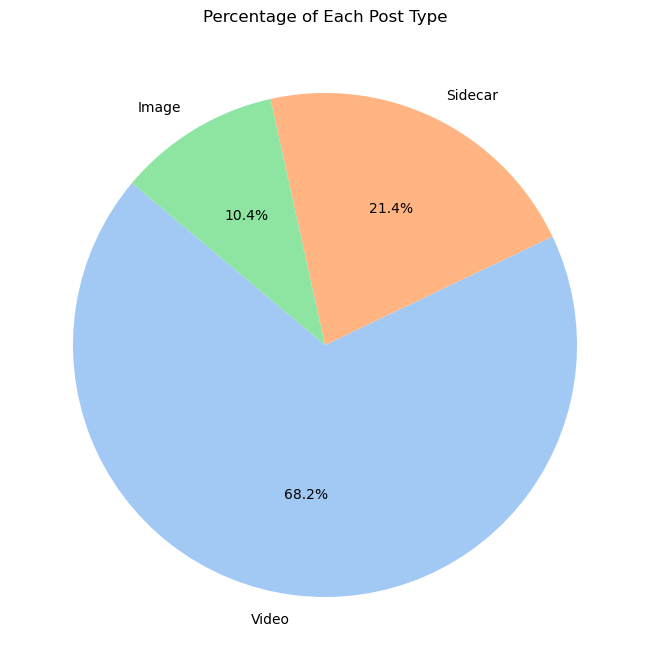

In [9]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(20, 18))
plt.subplot(2, 2, 2) 
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel")) 
plt.title("Percentage of Each Post Type") 

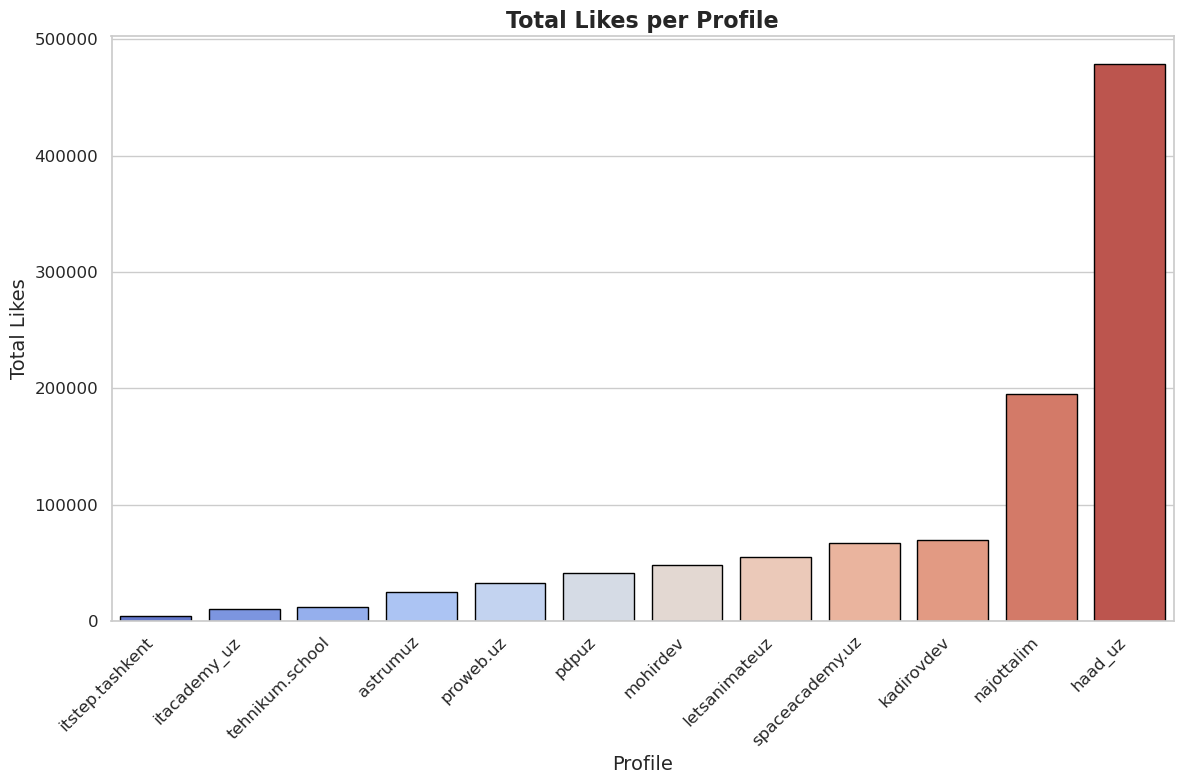

In [10]:
sns.set(style="whitegrid")

# Visualization for Total Comments per Profile
profile_likes = df.groupby('ownerUsername')['likesCount'].sum().reset_index()
profile_likes = profile_likes.sort_values(by='likesCount', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='ownerUsername',
    y='likesCount',
    data=profile_likes,
    palette='coolwarm',
    edgecolor='black',
    hue='ownerUsername',
    dodge=False,
    legend=False
)
plt.title('Total Likes per Profile', fontsize=16, fontweight='bold')
plt.xlabel('Profile', fontsize=14)
plt.ylabel('Total Likes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

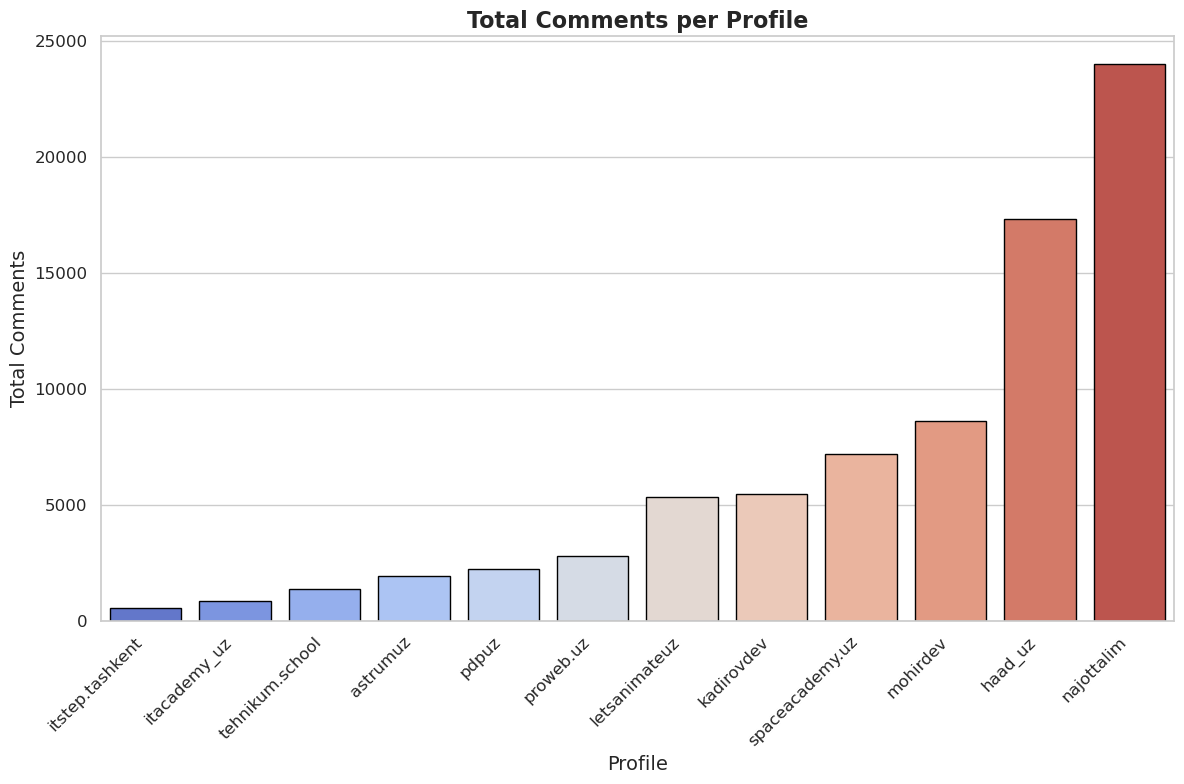

In [11]:
sns.set(style="whitegrid")

# Visualization for Total Comments per Profile
profile_comments = df.groupby('ownerUsername')['commentsCount'].sum().reset_index()
profile_comments = profile_comments.sort_values(by='commentsCount', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='ownerUsername',
    y='commentsCount',
    data=profile_comments,
    palette='coolwarm',
    edgecolor='black',
    hue='ownerUsername',
    dodge=False,
    legend=False
)
plt.title('Total Comments per Profile', fontsize=16, fontweight='bold')
plt.xlabel('Profile', fontsize=14)
plt.ylabel('Total Comments', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

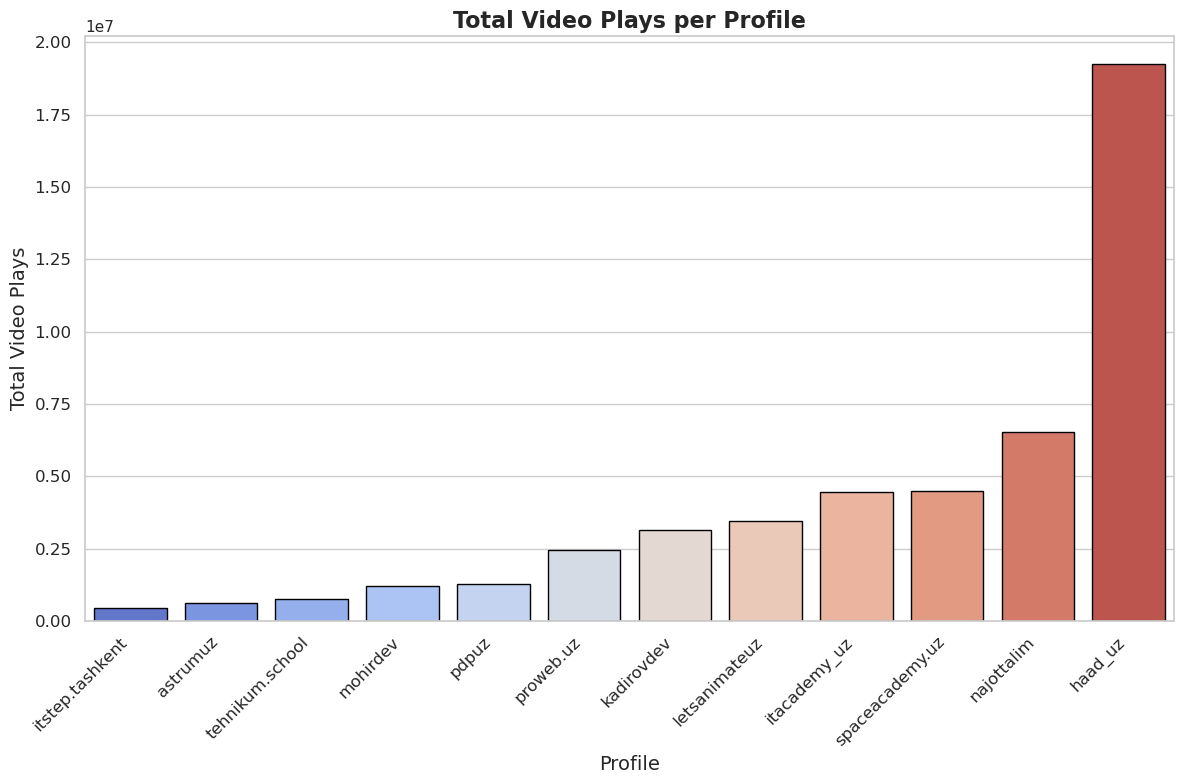

In [12]:
# Visualization for Total Video Plays per Profile
profile_plays = df.groupby('ownerUsername')['videoPlayCount'].sum().reset_index()
profile_plays = profile_plays.sort_values(by='videoPlayCount', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='ownerUsername',
    y='videoPlayCount',
    data=profile_plays,
    palette='coolwarm',
    edgecolor='black',
    hue='ownerUsername',
    dodge=False,
    legend=False
)
plt.title('Total Video Plays per Profile', fontsize=16, fontweight='bold')
plt.xlabel('Profile', fontsize=14)
plt.ylabel('Total Video Plays', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## 1. Eng ko'p like yig'gan postlar
## 2. Eng ko'p comment yig'gan postlar
## 3. Eng ko'p ko'rilgan postlar

In [13]:
top_5_likes_posts = df.nlargest(5, 'likesCount')
top_5_likes_posts

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
886,❗️Diqqat! Flipper Zero qurilmasi yordamida kre...,704,78229,Haad LC,haad_uz,Video,https://www.instagram.com/p/C_TVpzwqomT/,61.649,2157982.0
1428,Tug'ilgan yilingizni hech kim bilmasin 😅\n\nPa...,196,48674,Haad LC,haad_uz,Video,https://www.instagram.com/p/C7mM5nQK46p/,79.600,849391.0
1343,Hacker Robin Gud kim? Hamza Bendelladj\n\nMill...,301,33867,Haad LC,haad_uz,Video,https://www.instagram.com/p/C7rJLeJK77Z/,69.100,359069.0
1259,Ikkinchi qismida yana ham qiziqarli qila olami...,833,23787,Haad LC,haad_uz,Video,https://www.instagram.com/p/C9SR9AmqhK2/,54.566,672046.0
1198,"""Xakerlik Wi-Fi buzishdan boshlanadimi?"" mavzu...",187,17976,Haad LC,haad_uz,Video,https://www.instagram.com/p/C9u0UvhqS2a/,56.216,374925.0


In [14]:
top_5_comments_posts = df.nlargest(5, 'commentsCount')
top_5_comments_posts

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
1378,"🤩 Kutib oling, «Cambridge LC» va «Najot Ta’lim...",3770,7897,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C4-uihZNArD/,95.128,172007.0
668,Grafik dizayn kurslariga qabul ochiq!\n\nRo‘yx...,3276,5205,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C8wmpN2NLql/,29.520,115584.0
978,"Biz bepul beramiz, siz olasizmi?\n\n🤩 NLP prak...",1456,941,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C8CWg6oqUaq/,19.880,40413.0
1210,😊 Dasturchi bo’lish maqsadingizni ortga surman...,1399,2969,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C17hIgUqNVY/,21.333,59637.0
1307,Har qanday mobil qurilmani ishdan chiqaruvchi ...,1245,7806,Haad LC,haad_uz,Video,https://www.instagram.com/p/C8W-Qq2KCLD/,41.966,128674.0


In [15]:
top_5_plays_posts = df.nlargest(5, 'videoPlayCount')
top_5_plays_posts

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
941,Hacker bo’lish - endi shunchaki orzu emas!\n\n...,256,9659,Haad LC,haad_uz,Video,https://www.instagram.com/p/C-UdxE_KFl9/,79.411,2475735.0
886,❗️Diqqat! Flipper Zero qurilmasi yordamida kre...,704,78229,Haad LC,haad_uz,Video,https://www.instagram.com/p/C_TVpzwqomT/,61.649,2157982.0
464,"🌞 Мы каждый день спешим сделать сотни дел, и в...",10,1102,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C89o5TAuG9d/,89.976,1987774.0
1461,"No problem, here is the information 👇\n\nAxloq...",481,10006,Haad LC,haad_uz,Video,https://www.instagram.com/p/C6TdFqSKphm/,58.166,1513698.0
831,🎉 В августе в IT-Academy запускается множество...,1,1063,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C-Shn0rteMh/,15.066,1374395.0


# 1. Najot ta'lim (najottalim) 

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [16]:
top_5_likes_najottalim = df[df['ownerUsername'] == 'najottalim'].nlargest(5, 'likesCount')
top_5_likes_najottalim

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
708,Muhitingiz hayotingizni hal qiladi!\n\nSuhbatn...,301,13162,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C8Mzc5TNXKx/,71.266,395488.0
1090,Do'stlaringizni toʻgʻri tanlang!\n\nSuhbatning...,128,11540,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C8Jqvq7OVbS/,44.533,382307.0
1378,"🤩 Kutib oling, «Cambridge LC» va «Najot Ta’lim...",3770,7897,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C4-uihZNArD/,95.128,172007.0
415,Intizom siz uchun muammomi?\n\nYangilikni bili...,290,5688,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C-NtdcttVKu/,33.400,390066.0
668,Grafik dizayn kurslariga qabul ochiq!\n\nRo‘yx...,3276,5205,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C8wmpN2NLql/,29.520,115584.0


In [17]:
top_5_comments_najottalim = df[df['ownerUsername'] == 'najottalim'].nlargest(5, 'commentsCount')
top_5_comments_najottalim

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
1378,"🤩 Kutib oling, «Cambridge LC» va «Najot Ta’lim...",3770,7897,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C4-uihZNArD/,95.128,172007.0
668,Grafik dizayn kurslariga qabul ochiq!\n\nRo‘yx...,3276,5205,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C8wmpN2NLql/,29.520,115584.0
421,Yopiq telegram kanal havolasini olish uchun iz...,972,3268,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C-DZ4AGNQA_/,51.160,149206.0
193,Reelslarni TOP'ga chiqarish uchun yana qanday ...,813,980,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C_su5Fet9a2/,50.480,30171.0
336,Yangilik sizni kutmoqda...\n\nIzohda 7 raqamin...,505,1093,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C-XDzCXucLp/,59.400,33098.0


In [18]:
top_5_views_najottalim = df[df['ownerUsername'] == 'najottalim'].nlargest(5, 'videoPlayCount')
top_5_views_najottalim

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
708,Muhitingiz hayotingizni hal qiladi!\n\nSuhbatn...,301,13162,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C8Mzc5TNXKx/,71.266,395488.0
415,Intizom siz uchun muammomi?\n\nYangilikni bili...,290,5688,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C-NtdcttVKu/,33.400,390066.0
1090,Do'stlaringizni toʻgʻri tanlang!\n\nSuhbatning...,128,11540,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C8Jqvq7OVbS/,44.533,382307.0
1229,Grafik dizayn sohasini tajribali ustozlardan o...,103,1197,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C6OhVaEyBLU/,16.700,282907.0
1476,2023-yil «Najot Ta’lim» uchun o‘zgacha yil bo‘...,178,1204,Dasturlash | Dizayn | Marketing,najottalim,Video,https://www.instagram.com/p/C2ASOfft_--/,208.160,269706.0


# 2. Astrum - Biz yangi yulduzlarni kashf etamiz (astrumuz)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [19]:
# Top 5 by likes for astrumuz
top_5_likes_astrumuz = df[df['ownerUsername'] == 'astrumuz'].nlargest(5, 'likesCount')
top_5_likes_astrumuz

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
873,💧Dasturchilarning og’riqlari kodda qanday ko’r...,29,588,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C7tmmf3t5J9/,14.466,36403.0
1280,Sizda bunday vaziyat aniq bo'lgan! 😅\n\n🤨Tushu...,27,455,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Image,https://www.instagram.com/p/C3u-Na4KFMK/,NaN,NaN
1101,🔔 Astrum’da barcha kurslarga 80% chegirma!\n\n...,51,411,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C5NbFqjtnHb/,33.133,9603.0
853,📹 2024 yilning eng ko‘p pul to‘lanadigan IT ka...,20,409,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C8rgeh8tByF/,30.966,20551.0
1350,Dasturchilarda “uchinchi ko’z” bormi? 🤨\n\nYo’...,13,375,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C3DLi6GtN4S/,19.033,11094.0


In [20]:
# Top 5 by comments for astrumuz
top_5_comments_astrumuz = df[df['ownerUsername'] == 'astrumuz'].nlargest(5, 'commentsCount')
top_5_comments_astrumuz

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
233,🚀ASTRUM IT AKADEMIYASIDAN BIR HAFTALIK GRANT🚀\...,64,78,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Image,https://www.instagram.com/p/C-NiDAxtKTg/,NaN,NaN
1395,🚀 Astrumda Pre-season 14 uchun oxirgi ochiq es...,54,341,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C19qb9ItTkS/,37.433,10145.0
1101,🔔 Astrum’da barcha kurslarga 80% chegirma!\n\n...,51,411,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C5NbFqjtnHb/,33.133,9603.0
908,🙄 Oramizda dasturchi bo’lmaganlar nechta? \n\n...,49,197,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C7mIaaBIKyC/,8.466,10898.0
210,✈️ Yaponiyada amaliyot o’tashni istaysizmi? \n...,44,101,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C-pvvTRNoQp/,41.500,4119.0


In [21]:
# Top 5 by views for astrumuz
top_5_views_astrumuz = df[df['ownerUsername'] == 'astrumuz'].nlargest(5, 'videoPlayCount')
top_5_views_astrumuz

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
873,💧Dasturchilarning og’riqlari kodda qanday ko’r...,29,588,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C7tmmf3t5J9/,14.466,36403.0
853,📹 2024 yilning eng ko‘p pul to‘lanadigan IT ka...,20,409,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C8rgeh8tByF/,30.966,20551.0
1350,Dasturchilarda “uchinchi ko’z” bormi? 🤨\n\nYo’...,13,375,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C3DLi6GtN4S/,19.033,11094.0
908,🙄 Oramizda dasturchi bo’lmaganlar nechta? \n\n...,49,197,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C7mIaaBIKyC/,8.466,10898.0
792,😎 Bizni birlashtiradigan joy — ASTRUM!\n\n✍️ S...,42,179,Astrum - Biz yangi yulduzlarni kashf etamiz,astrumuz,Video,https://www.instagram.com/p/C-Smi05N1PU/,13.210,10472.0


# 3. SPACE ACADEMY (spaceacademy.uz)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [22]:
# Top 5 by likes for spaceacademy.uz
top_5_likes_spaceacademy = df[df['ownerUsername'] == 'spaceacademy.uz'].nlargest(5, 'likesCount')
top_5_likes_spaceacademy

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
786,Orzudagi hayotga 3 oy qoldi!\n\n⚡️ Yozgi ta’ti...,117,12950,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C7J4YIgNEFY/,32.932,517560.0
991,"Sekinroq gapiring, Google’ning ham qulog’i bor...",190,6872,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C2UhlSeN0UL/,14.120,250469.0
591,🎁 Bayramga Space Academy'dan siz kutgan sovg'a...,251,3489,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C_LU3u-NDI4/,28.161,404714.0
876,10-sinfdan 500$ daromad 🔥\n\n16 yoshli Nodirbe...,175,3435,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C4N_bslt-w4/,41.480,176459.0
976,"Maydalab o’tirmay, bittada o’qing!\n\n😀 Endi S...",303,3200,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C1rTaFhN5U7/,54.760,264095.0


In [23]:
# Top 5 by comments for spaceacademy.uz
top_5_comments_spaceacademy = df[df['ownerUsername'] == 'spaceacademy.uz'].nlargest(5, 'commentsCount')
top_5_comments_spaceacademy

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
976,"Maydalab o’tirmay, bittada o’qing!\n\n😀 Endi S...",303,3200,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C1rTaFhN5U7/,54.760,264095.0
918,Telefoningizdagi har bitta video pul keltirish...,273,415,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C3AakaQNhFt/,43.680,18223.0
591,🎁 Bayramga Space Academy'dan siz kutgan sovg'a...,251,3489,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C_LU3u-NDI4/,28.161,404714.0
1048,⚡️ Yilni yangiliklar bilan boshlaymiz\n\nUzoq ...,239,332,SPACE ACADEMY,spaceacademy.uz,Sidecar,https://www.instagram.com/p/C1mYFjlNswo/,NaN,NaN
862,📌 Reels foni uchun “shpargalka”\n\n👆 Videolari...,237,221,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C5OXHCpoECe/,17.416,8475.0


In [24]:
# Top 5 by views for spaceacademy.uz
top_5_views_spaceacademy = df[df['ownerUsername'] == 'spaceacademy.uz'].nlargest(5, 'videoPlayCount')
top_5_views_spaceacademy

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
786,Orzudagi hayotga 3 oy qoldi!\n\n⚡️ Yozgi ta’ti...,117,12950,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C7J4YIgNEFY/,32.932,517560.0
591,🎁 Bayramga Space Academy'dan siz kutgan sovg'a...,251,3489,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C_LU3u-NDI4/,28.161,404714.0
976,"Maydalab o’tirmay, bittada o’qing!\n\n😀 Endi S...",303,3200,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C1rTaFhN5U7/,54.760,264095.0
991,"Sekinroq gapiring, Google’ning ham qulog’i bor...",190,6872,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C2UhlSeN0UL/,14.120,250469.0
608,Onlayn mobilografiya kursiga qabul boshlandi!\...,220,703,SPACE ACADEMY,spaceacademy.uz,Video,https://www.instagram.com/p/C--iXl2te3O/,27.728,181133.0


# 4. Haad LC (haad_uz)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [25]:
# Top 5 by likes for haad_uz
top_5_likes_haad = df[df['ownerUsername'] == 'haad_uz'].nlargest(5, 'likesCount')
top_5_likes_haad

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
886,❗️Diqqat! Flipper Zero qurilmasi yordamida kre...,704,78229,Haad LC,haad_uz,Video,https://www.instagram.com/p/C_TVpzwqomT/,61.649,2157982.0
1428,Tug'ilgan yilingizni hech kim bilmasin 😅\n\nPa...,196,48674,Haad LC,haad_uz,Video,https://www.instagram.com/p/C7mM5nQK46p/,79.600,849391.0
1343,Hacker Robin Gud kim? Hamza Bendelladj\n\nMill...,301,33867,Haad LC,haad_uz,Video,https://www.instagram.com/p/C7rJLeJK77Z/,69.100,359069.0
1259,Ikkinchi qismida yana ham qiziqarli qila olami...,833,23787,Haad LC,haad_uz,Video,https://www.instagram.com/p/C9SR9AmqhK2/,54.566,672046.0
1198,"""Xakerlik Wi-Fi buzishdan boshlanadimi?"" mavzu...",187,17976,Haad LC,haad_uz,Video,https://www.instagram.com/p/C9u0UvhqS2a/,56.216,374925.0


In [26]:
# Top 5 by comments for haad_uz
top_5_comments_haad = df[df['ownerUsername'] == 'haad_uz'].nlargest(5, 'commentsCount')
top_5_comments_haad

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
1307,Har qanday mobil qurilmani ishdan chiqaruvchi ...,1245,7806,Haad LC,haad_uz,Video,https://www.instagram.com/p/C8W-Qq2KCLD/,41.966,128674.0
1259,Ikkinchi qismida yana ham qiziqarli qila olami...,833,23787,Haad LC,haad_uz,Video,https://www.instagram.com/p/C9SR9AmqhK2/,54.566,672046.0
886,❗️Diqqat! Flipper Zero qurilmasi yordamida kre...,704,78229,Haad LC,haad_uz,Video,https://www.instagram.com/p/C_TVpzwqomT/,61.649,2157982.0
279,Kiberhujumlar endi uzoqdagi tahdid emas!\n\nBi...,691,8623,Haad LC,haad_uz,Video,https://www.instagram.com/p/DAjIgFoKlpB/,62.739,833485.0
1320,Shubhali elektron qurilmalardan foydalanishda ...,657,2650,Haad LC,haad_uz,Video,https://www.instagram.com/p/C8hcvQJqwRk/,72.866,42034.0


In [27]:
# Top 5 by views for haad_uz
top_5_views_haad = df[df['ownerUsername'] == 'haad_uz'].nlargest(5, 'videoPlayCount')
top_5_views_haad

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
941,Hacker bo’lish - endi shunchaki orzu emas!\n\n...,256,9659,Haad LC,haad_uz,Video,https://www.instagram.com/p/C-UdxE_KFl9/,79.411,2475735.0
886,❗️Diqqat! Flipper Zero qurilmasi yordamida kre...,704,78229,Haad LC,haad_uz,Video,https://www.instagram.com/p/C_TVpzwqomT/,61.649,2157982.0
1461,"No problem, here is the information 👇\n\nAxloq...",481,10006,Haad LC,haad_uz,Video,https://www.instagram.com/p/C6TdFqSKphm/,58.166,1513698.0
947,Diqqat! \n\nKiberxavfsizlikni 0'dan o'rganish ...,588,2533,Haad LC,haad_uz,Video,https://www.instagram.com/p/C-sm4FpKFSg/,16.138,919694.0
1428,Tug'ilgan yilingizni hech kim bilmasin 😅\n\nPa...,196,48674,Haad LC,haad_uz,Video,https://www.instagram.com/p/C7mM5nQK46p/,79.600,849391.0


# 5. O‘zbekistondagi yetakchi onlayn ta’lim platforma (mohirdev)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [28]:
# Top 5 by likes for mohirdev
top_5_likes_mohirdev = df[df['ownerUsername'] == 'mohirdev'].nlargest(5, 'likesCount')
top_5_likes_mohirdev

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
1210,😊 Dasturchi bo’lish maqsadingizni ortga surman...,1399,2969,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C17hIgUqNVY/,21.333,59637.0
1158,🤔 Ilk kiberjinoyat internet kashf qilinishidan...,1177,2269,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C7RdAQfK1Gg/,62.958,39707.0
1091,Javoblaringizni izohlarda yozib qoldiring!,160,1779,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C5LgD2_K3oI/,16.680,34102.0
1089,Sunʻiy intellektni oʻrganish kerakmi?\n\n«Data...,424,1760,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C5Iwa3MqwIk/,24.458,46684.0
1147,🔥 Ertangi kuningizni bugun o’zgartiring!\n\n🧑🏻...,39,1731,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C2hQk9NKAEk/,46.733,107762.0


In [29]:
# Top 5 by comments for mohirdev
top_5_comments_mohirdev = df[df['ownerUsername'] == 'mohirdev'].nlargest(5, 'commentsCount')
top_5_comments_mohirdev

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
978,"Biz bepul beramiz, siz olasizmi?\n\n🤩 NLP prak...",1456,941,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C8CWg6oqUaq/,19.880,40413.0
1210,😊 Dasturchi bo’lish maqsadingizni ortga surman...,1399,2969,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C17hIgUqNVY/,21.333,59637.0
1099,👋 “Hello world” - eng kuchli mutaxassislar ham...,1193,1661,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C5DoTAxq1lg/,5.666,50665.0
1158,🤔 Ilk kiberjinoyat internet kashf qilinishidan...,1177,2269,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C7RdAQfK1Gg/,62.958,39707.0
1089,Sunʻiy intellektni oʻrganish kerakmi?\n\n«Data...,424,1760,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C5Iwa3MqwIk/,24.458,46684.0


In [30]:
# Top 5 by views for mohirdev
top_5_views_mohirdev = df[df['ownerUsername'] == 'mohirdev'].nlargest(5, 'videoPlayCount')
top_5_views_mohirdev

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
1147,🔥 Ertangi kuningizni bugun o’zgartiring!\n\n🧑🏻...,39,1731,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C2hQk9NKAEk/,46.733,107762.0
1216,🔥 Endi kurslarimizni ustamalarsiz 3 va 6 oyga ...,33,1168,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C2bkC5_qlYJ/,44.000,105452.0
1210,😊 Dasturchi bo’lish maqsadingizni ortga surman...,1399,2969,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C17hIgUqNVY/,21.333,59637.0
1071,Ingliz tilini oʻrganayotganlar uchun\n\n🤩 Edu-...,19,1397,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C5its7gKce2/,32.667,57011.0
1099,👋 “Hello world” - eng kuchli mutaxassislar ham...,1193,1661,O‘zbekistondagi yetakchi onlayn ta’lim platforma,mohirdev,Video,https://www.instagram.com/p/C5DoTAxq1lg/,5.666,50665.0


# 6. Let’s Animate oʻquv markazi (letsanimateuz)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [31]:
# Top 5 by likes for letsanimateuz
top_5_likes_letsanimateuz = df[df['ownerUsername'] == 'letsanimateuz'].nlargest(5, 'likesCount')
top_5_likes_letsanimateuz

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
675,Interyer dizayn sohasini “Letʼs Animate”da oʻr...,196,16267,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C3DGDBStSjF/,32.111,412528.0
686,Qiziqarli mashgʻulot bilan band boʻling!\n\n✅ ...,640,9199,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C3AJPLVt5oC/,36.000,490426.0
397,"Yurtimiz aholisidan, qaysi fast food tarmoqlar...",888,8421,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C7G4Q8itfRW/,32.200,680465.0
750,Shu ishlarni oʻzbeklar qilganmi? \n\nJahon miq...,418,4176,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C2fPXumN3w4/,80.633,109811.0
27,Motion dizaynda ishlash vaqti keldi! \n\n⚡️Gra...,205,1518,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C-ueeV9u5sr/,54.566,428742.0


In [32]:
# Top 5 by comments for letsanimateuz
top_5_comments_letsanimateuz = df[df['ownerUsername'] == 'letsanimateuz'].nlargest(5, 'commentsCount')
top_5_comments_letsanimateuz

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
397,"Yurtimiz aholisidan, qaysi fast food tarmoqlar...",888,8421,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C7G4Q8itfRW/,32.200,680465.0
686,Qiziqarli mashgʻulot bilan band boʻling!\n\n✅ ...,640,9199,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C3AJPLVt5oC/,36.000,490426.0
130,Nega Arxitektorkarga BIM texnologiyasi kerak?\...,455,1492,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C9nNIauNujA/,92.766,310884.0
750,Shu ishlarni oʻzbeklar qilganmi? \n\nJahon miq...,418,4176,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C2fPXumN3w4/,80.633,109811.0
135,"Moushn Dizayn - bu san’atning alohida turi, un...",321,1474,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C-BBXc5NIk_/,43.633,382873.0


In [33]:
# Top 5 by views for letsanimateuz
top_5_views_letsanimateuz = df[df['ownerUsername'] == 'letsanimateuz'].nlargest(5, 'videoPlayCount')
top_5_views_letsanimateuz

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
397,"Yurtimiz aholisidan, qaysi fast food tarmoqlar...",888,8421,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C7G4Q8itfRW/,32.200,680465.0
686,Qiziqarli mashgʻulot bilan band boʻling!\n\n✅ ...,640,9199,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C3AJPLVt5oC/,36.000,490426.0
27,Motion dizaynda ishlash vaqti keldi! \n\n⚡️Gra...,205,1518,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C-ueeV9u5sr/,54.566,428742.0
675,Interyer dizayn sohasini “Letʼs Animate”da oʻr...,196,16267,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C3DGDBStSjF/,32.111,412528.0
135,"Moushn Dizayn - bu san’atning alohida turi, un...",321,1474,Let’s Animate oʻquv markazi,letsanimateuz,Video,https://www.instagram.com/p/C-BBXc5NIk_/,43.633,382873.0


# 7. IT и Digital курсы в Ташкенте (proweb.uz)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [34]:
# Top 5 by likes for proweb.uz
top_5_likes_proweb = df[df['ownerUsername'] == 'proweb.uz'].nlargest(5, 'likesCount')
top_5_likes_proweb

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
713,"Стоите перед выбором, какую профессию освоить?...",7,6867,IT и Digital курсы в Ташкенте,proweb.uz,Video,https://www.instagram.com/p/C_8Lzfstabp/,55.472,541557.0
1211,"Представьте, что вы уже учитесь в PROWEB. Мы р...",100,2410,IT и Digital курсы в Ташкенте,proweb.uz,Video,https://www.instagram.com/p/C2NR_jJtEth/,252.452,942915.0
1207,Путь от электромонтажника до видеомонтажера. 😎...,14,1109,IT и Digital курсы в Ташкенте,proweb.uz,Video,https://www.instagram.com/p/C2KrPtgNaBC/,62.929,159753.0
1164,Реально ли стать Full Stack в разработчиком в ...,72,1088,IT и Digital курсы в Ташкенте,proweb.uz,Video,https://www.instagram.com/p/C35NUNPtzx6/,53.928,153578.0
410,Встречайте новых специалистов сферы Digital и ...,12,545,IT и Digital курсы в Ташкенте,proweb.uz,Sidecar,https://www.instagram.com/p/C74Pn4FtS11/,NaN,NaN


In [35]:
# Top 5 by comments for proweb.uz
top_5_comments_proweb = df[df['ownerUsername'] == 'proweb.uz'].nlargest(5, 'commentsCount')
top_5_comments_proweb

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
304,Не упустите шанс сделать последний месяц лета ...,167,115,IT и Digital курсы в Ташкенте,proweb.uz,Sidecar,https://www.instagram.com/p/C-IUMjJNpb2/,NaN,NaN
406,Поздравляем всех с первым днем лета. ☀️ \n\nНо...,150,137,IT и Digital курсы в Ташкенте,proweb.uz,Sidecar,https://www.instagram.com/p/C7rayuCNQRs/,NaN,NaN
1275,Если вы хотите начать год с продуктивного заня...,144,161,IT и Digital курсы в Ташкенте,proweb.uz,Sidecar,https://www.instagram.com/p/C1pQanNNPiA/,NaN,NaN
859,"Кого любят, того ждут. 😉\nИ наши курсы подожду...",139,110,IT и Digital курсы в Ташкенте,proweb.uz,Sidecar,https://www.instagram.com/p/C84fZdutaNG/,NaN,NaN
170,"Сентябрь — идеальное время, чтобы начать путь ...",134,115,IT и Digital курсы в Ташкенте,proweb.uz,Sidecar,https://www.instagram.com/p/C_YIoc8OTDt/,NaN,NaN


In [36]:
# Top 5 by views for proweb.uz
top_5_views_proweb = df[df['ownerUsername'] == 'proweb.uz'].nlargest(5, 'videoPlayCount')
top_5_views_proweb

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
1211,"Представьте, что вы уже учитесь в PROWEB. Мы р...",100,2410,IT и Digital курсы в Ташкенте,proweb.uz,Video,https://www.instagram.com/p/C2NR_jJtEth/,252.452,942915.0
713,"Стоите перед выбором, какую профессию освоить?...",7,6867,IT и Digital курсы в Ташкенте,proweb.uz,Video,https://www.instagram.com/p/C_8Lzfstabp/,55.472,541557.0
1207,Путь от электромонтажника до видеомонтажера. 😎...,14,1109,IT и Digital курсы в Ташкенте,proweb.uz,Video,https://www.instagram.com/p/C2KrPtgNaBC/,62.929,159753.0
1164,Реально ли стать Full Stack в разработчиком в ...,72,1088,IT и Digital курсы в Ташкенте,proweb.uz,Video,https://www.instagram.com/p/C35NUNPtzx6/,53.928,153578.0
505,Наши юные студенты не перестают радовать нас. ...,34,403,IT и Digital курсы в Ташкенте,proweb.uz,Video,https://www.instagram.com/p/C6yoJletGIF/,38.538,47350.0


# 8. Школа программирования	 (itacademy_uz)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [37]:
# Top 5 by likes for itacademy_uz
top_5_likes_itacademy = df[df['ownerUsername'] == 'itacademy_uz'].nlargest(5, 'likesCount')
top_5_likes_itacademy

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
464,"🌞 Мы каждый день спешим сделать сотни дел, и в...",10,1102,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C89o5TAuG9d/,89.976,1987774.0
734,Как совмещать дополнительное образование с учё...,77,1097,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C22UDhDNalN/,36.900,375264.0
831,🎉 В августе в IT-Academy запускается множество...,1,1063,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C-Shn0rteMh/,15.066,1374395.0
741,Dasturlashni o’rganishni boshlaganda har kimni...,148,928,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C2xBs6-tHBn/,51.100,157349.0
999,Python dasturlash tili qanday imkoniyatlarni o...,171,532,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C3P3--1NRrJ/,42.666,77574.0


In [38]:
# Top 5 by comments for itacademy_uz
top_5_comments_itacademy = df[df['ownerUsername'] == 'itacademy_uz'].nlargest(5, 'commentsCount')
top_5_comments_itacademy

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
999,Python dasturlash tili qanday imkoniyatlarni o...,171,532,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C3P3--1NRrJ/,42.666,77574.0
741,Dasturlashni o’rganishni boshlaganda har kimni...,148,928,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C2xBs6-tHBn/,51.100,157349.0
734,Как совмещать дополнительное образование с учё...,77,1097,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C22UDhDNalN/,36.900,375264.0
544,На прошлой неделе мы взяли небольшое интервью ...,30,82,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C7eXh8EtWNm/,76.843,15678.0
616,Chilonzor tumanida filialimizni yaqinda ochish...,30,354,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C5yJsX_N42O/,34.666,80795.0


In [39]:
# Top 5 by views for itacademy_uz
top_5_views_itacademy = df[df['ownerUsername'] == 'itacademy_uz'].nlargest(5, 'videoPlayCount')
top_5_views_itacademy

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
464,"🌞 Мы каждый день спешим сделать сотни дел, и в...",10,1102,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C89o5TAuG9d/,89.976,1987774.0
831,🎉 В августе в IT-Academy запускается множество...,1,1063,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C-Shn0rteMh/,15.066,1374395.0
734,Как совмещать дополнительное образование с учё...,77,1097,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C22UDhDNalN/,36.900,375264.0
741,Dasturlashni o’rganishni boshlaganda har kimni...,148,928,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C2xBs6-tHBn/,51.100,157349.0
616,Chilonzor tumanida filialimizni yaqinda ochish...,30,354,Школа программирования,itacademy_uz,Video,https://www.instagram.com/p/C5yJsX_N42O/,34.666,80795.0


# 9. PDP Academy (pdpuz)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [40]:
# Top 5 by likes for pdpuz
top_5_likes_pdpuz = df[df['ownerUsername'] == 'pdpuz'].nlargest(5, 'likesCount')
top_5_likes_pdpuz

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
403,ITni mukammal o’rganmoqchi bo’lsangiz PDP Acad...,252,16681,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C8cL0QaNAk5/,62.120,319027.0
953,PDP Academy - IT va dasturlashga ixtisoslashga...,85,3821,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C5s465KNP7N/,127.600,139566.0
287,"17 yoshda 1000$ topish siri, Backend dasturchi...",110,2123,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C-AvWv0NELy/,45.587,149525.0
698,PDP Academy– zamonaviy kasblarning mutaxassisi...,44,956,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C24h24eNH7p/,70.166,19378.0
393,😳😳 \n\nPDP Academy dasturlash kurslariga start...,30,861,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C9KisOYt1H5/,10.586,64767.0


In [41]:
# Top 5 by comments for pdpuz
top_5_comments_pdpuz = df[df['ownerUsername'] == 'pdpuz'].nlargest(5, 'commentsCount')
top_5_comments_pdpuz

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
403,ITni mukammal o’rganmoqchi bo’lsangiz PDP Acad...,252,16681,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C8cL0QaNAk5/,62.120,319027.0
297,🤔 IT’ni qanday qilib sifatli Online o‘rgansa b...,236,501,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C9xUmFpti2W/,22.563,30032.0
287,"17 yoshda 1000$ topish siri, Backend dasturchi...",110,2123,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C-AvWv0NELy/,45.587,149525.0
477,Dasturlashni online va sifatli o’rgansa bo’lad...,89,184,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C8FIhrNNZVz/,43.892,8399.0
953,PDP Academy - IT va dasturlashga ixtisoslashga...,85,3821,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C5s465KNP7N/,127.600,139566.0


In [42]:
# Top 5 by views for pdpuz
top_5_views_pdpuz = df[df['ownerUsername'] == 'pdpuz'].nlargest(5, 'videoPlayCount')
top_5_views_pdpuz

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
403,ITni mukammal o’rganmoqchi bo’lsangiz PDP Acad...,252,16681,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C8cL0QaNAk5/,62.120,319027.0
287,"17 yoshda 1000$ topish siri, Backend dasturchi...",110,2123,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C-AvWv0NELy/,45.587,149525.0
953,PDP Academy - IT va dasturlashga ixtisoslashga...,85,3821,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C5s465KNP7N/,127.600,139566.0
393,😳😳 \n\nPDP Academy dasturlash kurslariga start...,30,861,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C9KisOYt1H5/,10.586,64767.0
297,🤔 IT’ni qanday qilib sifatli Online o‘rgansa b...,236,501,PDP Academy,pdpuz,Video,https://www.instagram.com/p/C9xUmFpti2W/,22.563,30032.0


# 10. Kadirov Dev (kadirovdev)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [43]:
# Top 5 by likes for kadirovdev
top_5_likes_kadirovdev = df[df['ownerUsername'] == 'kadirovdev'].nlargest(5, 'likesCount')
top_5_likes_kadirovdev

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
0,Nega o'quv kurslaringiz aynan online?\n\n---\n...,108,17935,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/CgGqPPUM7Y5/,84.800,NaN
239,❗️Oxirgi MIDDLE kurs\n\n❕Akmal Kadirovdan dast...,316,5725,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C8r7ywROSF9/,90.006,1104918.0
533,"𝑶ʻ𝒛𝒃𝒆𝒌𝒊𝒔𝒕𝒐𝒏𝒏𝒊 𝒅𝒖𝒏𝒚𝒐 𝒃𝒐ʻ𝒚𝒊𝒄𝒉𝒂, 𝑰𝑻 𝒔𝒐𝒉𝒂𝒔𝒊𝒅𝒂 𝒃𝒊𝒓𝒊...",218,3049,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C6NU-h2Cn9a/,57.066,126092.0
669,🧑‍💻Ishlayotkan vaqtingiz siz kasb o’rganasiz\n...,24,3015,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C3QFV0vNEbk/,78.400,426642.0
120,Durov telegramning marketingini Yevropada ham ...,106,2467,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C_QmrHOutVd/,90.022,67508.0


In [44]:
# Top 5 by comments for kadirovdev
top_5_comments_kadirovdev = df[df['ownerUsername'] == 'kadirovdev'].nlargest(5, 'commentsCount')
top_5_comments_kadirovdev

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
487,Baxtli insonlar 5 nafar boʻladi!\n\n❗️ Sababi ...,899,1479,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C6ZEz75NZ4r/,52.333,39574.0
239,❗️Oxirgi MIDDLE kurs\n\n❕Akmal Kadirovdan dast...,316,5725,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C8r7ywROSF9/,90.006,1104918.0
596,𝐍𝐢𝐦𝐚 𝐪𝐢𝐥𝐬𝐚𝐦 𝐛𝐨ʻ𝐥𝐚𝐝𝐢 ? \n.\n.\n.\n.\n.\n.\n.\n....,301,1400,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C5OaBdFtvWh/,99.691,18890.0
530,"𝐂𝐡𝐨’𝐜𝐡𝐪𝐚𝐧𝐢 𝐛𝐨𝐥𝐚𝐬𝐢 😂…\n.\n.\n.\n.\nShu gapimga,...",235,1711,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C6BnLzrtd_p/,54.000,43858.0
533,"𝑶ʻ𝒛𝒃𝒆𝒌𝒊𝒔𝒕𝒐𝒏𝒏𝒊 𝒅𝒖𝒏𝒚𝒐 𝒃𝒐ʻ𝒚𝒊𝒄𝒉𝒂, 𝑰𝑻 𝒔𝒐𝒉𝒂𝒔𝒊𝒅𝒂 𝒃𝒊𝒓𝒊...",218,3049,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C6NU-h2Cn9a/,57.066,126092.0


In [45]:
# Top 5 by views for kadirovdev
top_5_views_kadirovdev = df[df['ownerUsername'] == 'kadirovdev'].nlargest(5, 'videoPlayCount')
top_5_views_kadirovdev

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
239,❗️Oxirgi MIDDLE kurs\n\n❕Akmal Kadirovdan dast...,316,5725,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C8r7ywROSF9/,90.006,1104918.0
669,🧑‍💻Ishlayotkan vaqtingiz siz kasb o’rganasiz\n...,24,3015,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C3QFV0vNEbk/,78.400,426642.0
459,Endi siz ham dasturchi boʻla olasiz!\n\nBuning...,113,1678,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C68O_7DOeRH/,48.133,330384.0
478,Farzandini sevuvchi ota-onalar diqqatiga!\n\n🫵...,69,778,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C67h1eAiNt_/,46.766,158518.0
533,"𝑶ʻ𝒛𝒃𝒆𝒌𝒊𝒔𝒕𝒐𝒏𝒏𝒊 𝒅𝒖𝒏𝒚𝒐 𝒃𝒐ʻ𝒚𝒊𝒄𝒉𝒂, 𝑰𝑻 𝒔𝒐𝒉𝒂𝒔𝒊𝒅𝒂 𝒃𝒊𝒓𝒊...",218,3049,Kadirov Dev,kadirovdev,Video,https://www.instagram.com/p/C6NU-h2Cn9a/,57.066,126092.0


# 11. ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ	 (itstep.tashkent)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [46]:
# Top 5 by likes for itstep.tashkent
top_5_likes_itstep = df[df['ownerUsername'] == 'itstep.tashkent'].nlargest(5, 'likesCount')
top_5_likes_itstep

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
329,Выпустили в мир новых заряженных и готовых тво...,1,1241,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C6tTcDrNL4Z/,12.566,28595.0
226,🔥Летний IT лагерь. Только 1 и 2 июня скидка 20...,19,670,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C7qVJvzt7r8/,23.423,69429.0
1116,Front-end и back-end - две ключевые области в ...,1,205,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Image,https://www.instagram.com/p/C2cKdndNjWW/,NaN,NaN
1142,"Думаете, кодинг – это только для парней? Давай...",5,147,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C2rUzRfNbyW/,7.800,10899.0
332,Открыт набор в Летний IT лагерь неполного дня😎...,26,146,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C6nYfK4NnSe/,50.966,23565.0


In [47]:
# Top 5 by comments for itstep.tashkent
top_5_comments_itstep = df[df['ownerUsername'] == 'itstep.tashkent'].nlargest(5, 'commentsCount')
top_5_comments_itstep

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
328,Мы знаем чем занять вашего ребёнка летом ☀️\n\...,91,24,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C60841yNzml/,38.500,2303.0
1277,Как получить от лета максимум пользы ребенку? ...,56,21,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Sidecar,https://www.instagram.com/p/C3kPLaxNkWH/,NaN,NaN
155,Хотите использовать выходные для полезного обу...,34,19,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C-Sa7fVNhFC/,18.533,2109.0
1084,Откройте новые горизонты в мире технологий! 🖥️...,29,64,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C2_8c0LtR-f/,17.533,36670.0
332,Открыт набор в Летний IT лагерь неполного дня😎...,26,146,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C6nYfK4NnSe/,50.966,23565.0


In [48]:
# Top 5 by views for itstep.tashkent
top_5_views_itstep = df[df['ownerUsername'] == 'itstep.tashkent'].nlargest(5, 'videoPlayCount')
top_5_views_itstep

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
338,В летнем IT лагере IT STEP каждый день наполне...,22,96,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C6A642_tQMc/,18.800,82523.0
226,🔥Летний IT лагерь. Только 1 и 2 июня скидка 20...,19,670,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C7qVJvzt7r8/,23.423,69429.0
1084,Откройте новые горизонты в мире технологий! 🖥️...,29,64,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C2_8c0LtR-f/,17.533,36670.0
329,Выпустили в мир новых заряженных и готовых тво...,1,1241,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C6tTcDrNL4Z/,12.566,28595.0
332,Открыт набор в Летний IT лагерь неполного дня😎...,26,146,ОБУЧЕНИЕ ПРОГРАММИРОВАНИЮ И ДИЗАЙНУ В ТАШКЕНТЕ,itstep.tashkent,Video,https://www.instagram.com/p/C6nYfK4NnSe/,50.966,23565.0


# 12. TEHNIKUM	 (tehnikum.school	)

- Eng ko'p like yig'gan postlarning top 5 tasi
- Eng ko'p comment yig'gan postlarning top 5 tasi
- Eng ko'p ko'rilgan postlarning top 5 tasi

In [49]:
# Top 5 by likes for tehnikum.school
top_5_likes_tehnikum = df[df['ownerUsername'] == 'tehnikum.school'].nlargest(5, 'likesCount')
top_5_likes_tehnikum

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
50,Пати керейме?\n\nКак всегда мы должны отпраздн...,82,3386,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C5gK4P6NY-v/,51.720,132402.0
175,С праздником наши милые дамы❤️\n\n50% скидка д...,72,1217,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C4N8csrNLtI/,47.960,65353.0
189,"Навруз Муборак, Джигарлар!)\n\nОт всей души по...",21,880,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C4xY_SNN54A/,36.066,28920.0
166,"Чтобы провести лето круто, надо начать с Весны...",59,822,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C35P0SJtZU2/,11.000,65362.0
45,3 упражнения для вашей продуктивности..\n\n🔥Пе...,65,809,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C6DqmUOt8p2/,83.240,34476.0


In [50]:
# Top 5 by comments for tehnikum.school
top_5_comments_tehnikum = df[df['ownerUsername'] == 'tehnikum.school'].nlargest(5, 'commentsCount')
top_5_comments_tehnikum

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
46,🚀 Запись на курс СММ-специалиста открыта!\n\n❗...,186,-1,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C71tUMvtWMx/,9.541,21674.0
42,🔥Работы наших студентов с нуля и за один месяц...,172,334,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C086AFytULu/,15.666,28655.0
162,Разыгрываем браслет от @balenciaga \nИ невидим...,160,553,⚡️TEHNIKUM,tehnikum.school,Sidecar,https://www.instagram.com/p/C4a7nSItKFF/,NaN,NaN
43,Самый короткий и безопасный путь начать свой п...,115,170,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C9-PQs6tvaT/,13.733,15287.0
581,"Внимание, народ! 💥 \nНаша студентка прошла кур...",94,799,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C8FSpQbIo9j/,32.458,53513.0


In [51]:
# Top 5 by views for tehnikum.school
top_5_views_tehnikum = df[df['ownerUsername'] == 'tehnikum.school'].nlargest(5, 'videoPlayCount')
top_5_views_tehnikum

,caption,commentsCount,likesCount,ownerFullName,ownerUsername,type,url,videoDuration,videoPlayCount
50,Пати керейме?\n\nКак всегда мы должны отпраздн...,82,3386,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C5gK4P6NY-v/,51.720,132402.0
165,🌙Сделай добро для себя и для близких\n\nЗаписы...,38,476,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C4fyJN2NAes/,21.200,99890.0
166,"Чтобы провести лето круто, надо начать с Весны...",59,822,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C35P0SJtZU2/,11.000,65362.0
175,С праздником наши милые дамы❤️\n\n50% скидка д...,72,1217,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C4N8csrNLtI/,47.960,65353.0
581,"Внимание, народ! 💥 \nНаша студентка прошла кур...",94,799,⚡️TEHNIKUM,tehnikum.school,Video,https://www.instagram.com/p/C8FSpQbIo9j/,32.458,53513.0
